# ADC noise analysis for ESP32 using BC547B NPN transistor as an amplifier

In this notebook, we will use the ADC of the ESP32 to measure the gain of a BC547B NPN transistor. The goal of this experiment is to determine if the uncertanty of the ADC is of substantial segnificance when numerically deriving circuit properties.

## Importing the libraries

In [712]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from uncertainties import ufloat

## Importing the data

### Source

The following three data files contain 300,000 readings each (250 readings per second over 20 minutes)

The column "value" represents input 1 and "value2" represents input 2 throughout all datasets

In [713]:
# During base source data the inputs were connected to the signal source through two separate lowpass filters.
# One filter for each input. The output signal maintains the same level throughout the experiment.
# The purpose of this file is to determine how the filters affect the readings
# This should be compensated for when analysing transistor data
base_source_data = pd.read_csv("../output/base_2.csv", sep=", ", engine="python")

In [714]:
print(base_source_data.shape)
base_source_data.head()

(300006, 3)


,time,value,value2
0,10780120,2289,2559
1,10780124,2286,2550
2,10780128,2287,2551
3,10780132,2288,2554
4,10780136,2287,2553


### Transistor

In [715]:
# In transistor data, the column "value" was measured at the base of the transistor
# meaning it measures the transistor base voltage
# "value2" was measured at the collector of the transistor
# meaning it measures the transistor collector voltage
transistor_data = pd.read_csv("../output/transistor_5.csv", sep=", ", engine="python")

In [716]:
print(transistor_data.shape)
transistor_data.head()

(300004, 3)


,time,value,value2
0,6952172,754,3334
1,6952176,756,3341
2,6952180,761,3343
3,6952184,752,3331
4,6952188,756,3339


### Transistor reverse

In [717]:
# In transistor reverse data, everything is the same
# except the physical input connections are swapped
# so that "value" is measured at the collector
# and "value2" is measured at the base
# The purpose of this is to compare the two measurements
# to see if the inputs, and by extension the filters, behave differently at different voltage levels
# and thus determine if this must be accounted for
transistor_reverse_data = pd.read_csv("../output/transistor_reverse_5.csv", sep=", ", engine="python")

In [718]:
print(transistor_reverse_data.shape)
transistor_reverse_data.head()

(300006, 3)


,time,value,value2
0,8283500,3197,937
1,8283504,3199,939
2,8283508,3188,929
3,8283512,3191,931
4,8283516,3195,931


## Clean the source data

### Time axis

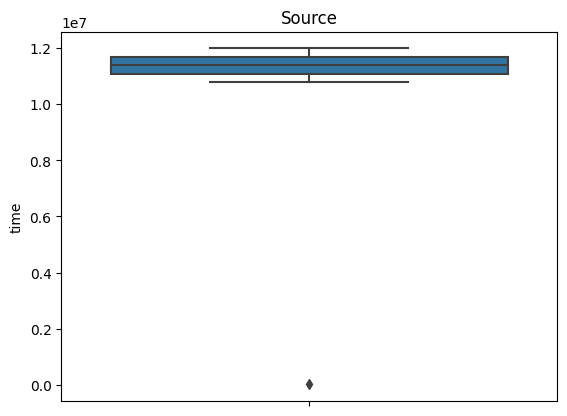

In [719]:
plt.title("Source")
sns.boxplot(y="time", data=base_source_data)
plt.show()

Time should not have any outliers. We remove the outlier.

In [720]:
base_source_data.drop(np.argmin(base_source_data["time"]), inplace=True)

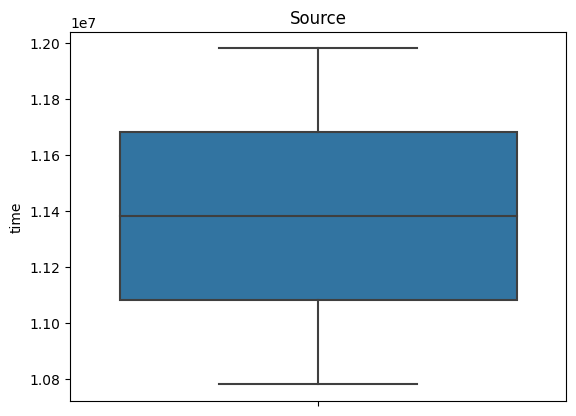

In [721]:
plt.title("Source")
sns.boxplot(y="time", data=base_source_data)
plt.show()

### Value 1

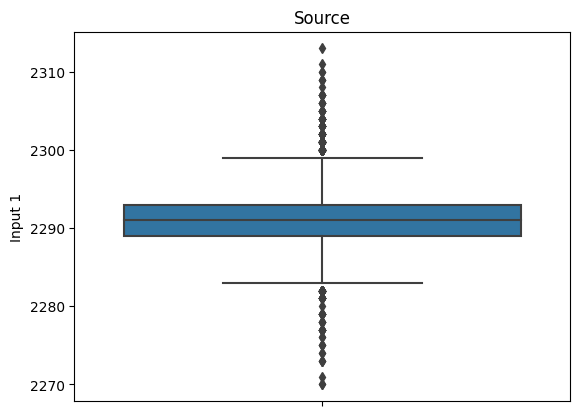

In [722]:
plt.title("Source")
sns.boxplot(y="value", data=base_source_data)
plt.ylabel("Input 1")
plt.show()

There are some outliers, however none such as they would constitute a transmission error. They are likely caused by power fluctuations in the power supply (my computer) or other external factors. We plot the data to determine if this is worth acocunting for.

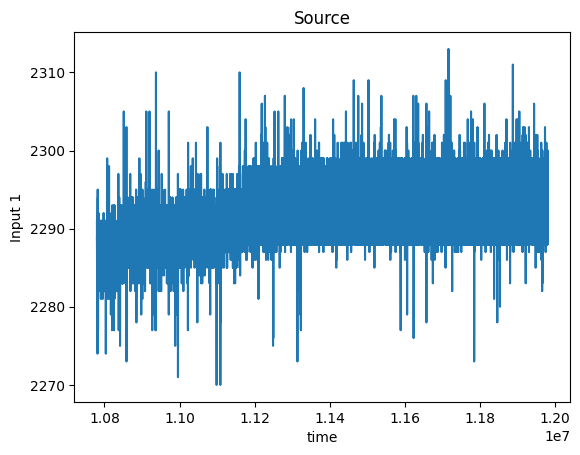

In [723]:
plt.title("Source")
sns.lineplot(x="time", y="value", data=base_source_data)
plt.ylabel("Input 1")
plt.show()

While these spikes are geniune datapoints, addressing these spikes is not currently a priority. We will remove them from the dataset, and prioritize the more regular input noise.

In [724]:
base_source_data = base_source_data.query("value < value.quantile(.999)")
base_source_data = base_source_data.query("value > value.quantile(.001)")

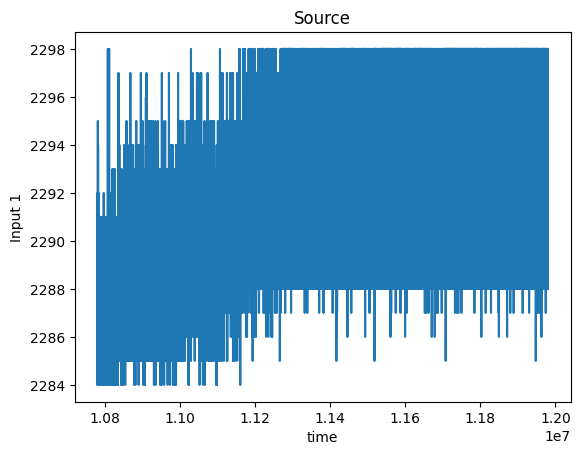

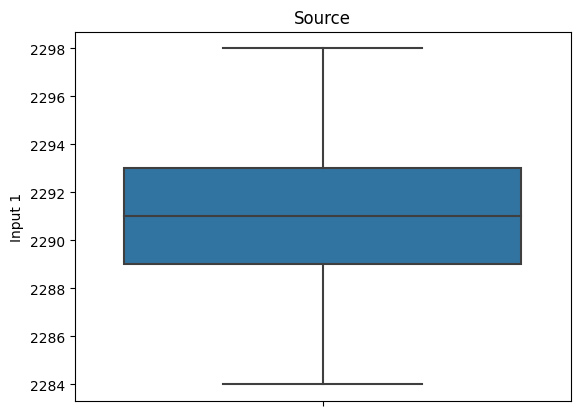

In [725]:
plt.title("Source")
sns.lineplot(x="time", y="value", data=base_source_data)
plt.ylabel("Input 1")
plt.show()

plt.title("Source")
sns.boxplot(y="value", data=base_source_data)
plt.ylabel("Input 1")
plt.show()

### Value 2

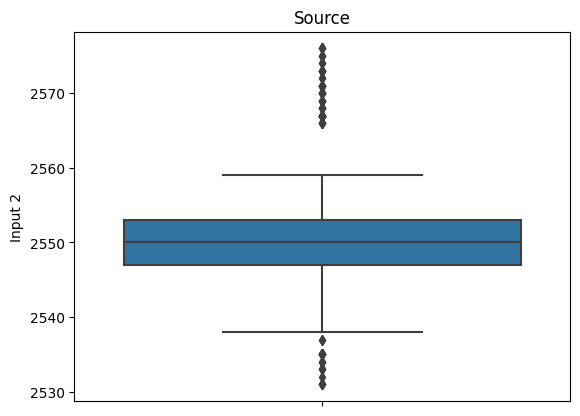

In [726]:
plt.title("Source")
sns.boxplot(y="value2", data=base_source_data)
plt.ylabel("Input 2")
plt.show()

The same analysis applies to this as for the previous value.

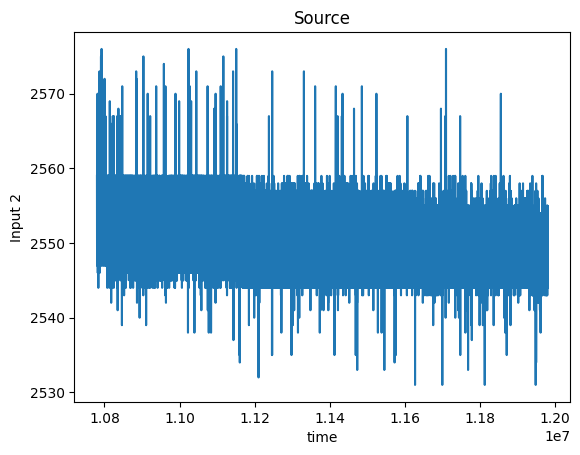

In [727]:
plt.title("Source")
sns.lineplot(x="time", y="value2", data=base_source_data)
plt.ylabel("Input 2")
plt.show()

Just like for value 1 we remove the most extreme spikes from the dataset.

In [728]:
base_source_data = base_source_data.query("value2 < value2.quantile(.999)")
base_source_data = base_source_data.query("value2 > value2.quantile(.001)")

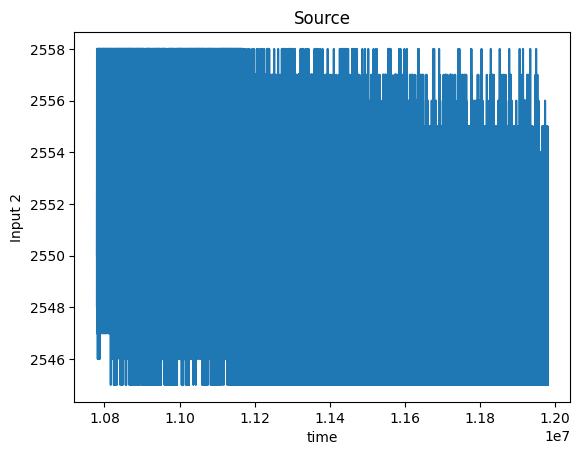

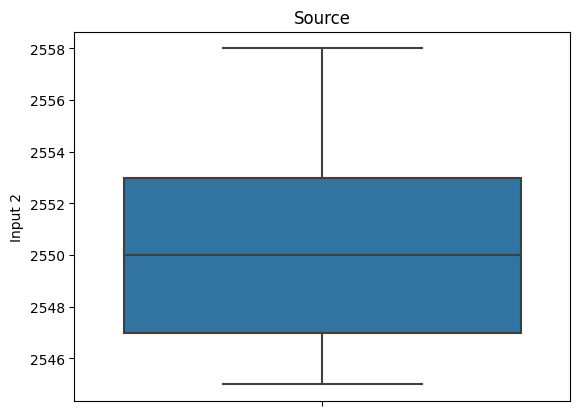

In [729]:
plt.title("Source")
sns.lineplot(x="time", y="value2", data=base_source_data)
plt.ylabel("Input 2")
plt.show()

plt.title("Source")
sns.boxplot(y="value2", data=base_source_data)
plt.ylabel("Input 2")
plt.show()

Now we need to make sure that this had no adverse effect on the value 1 dataset

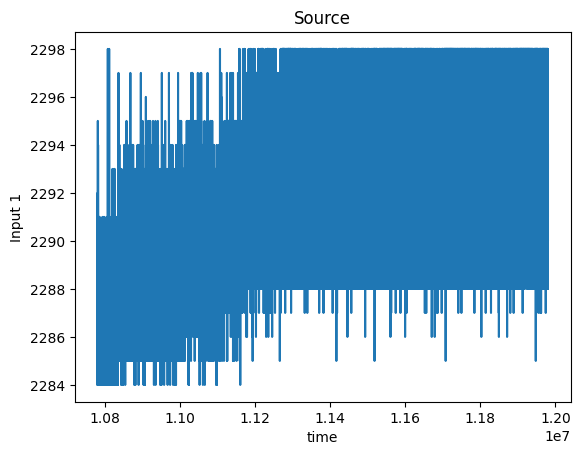

In [730]:
plt.title("Source")
sns.lineplot(x="time", y="value", data=base_source_data)
plt.ylabel("Input 1")
plt.show()

The value 1 graph looks the same as before, meaning our change was ok.

## Clean the transistor data

### Time axis

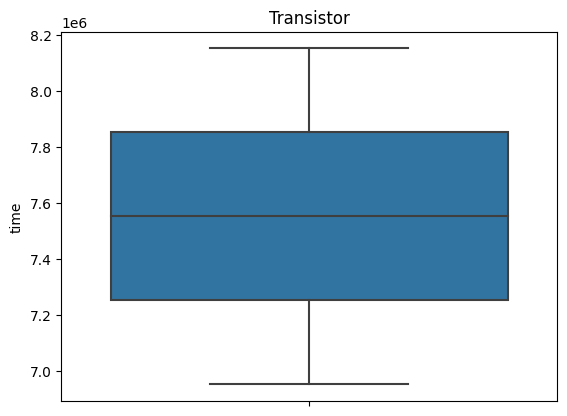

In [731]:
plt.title("Transistor")
sns.boxplot(y="time", data=transistor_data)
plt.show()

The time axis has no outliers for this dataset

### Value 1

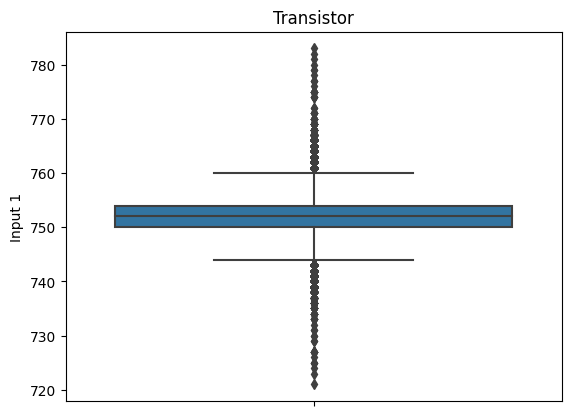

In [732]:
plt.title("Transistor")
sns.boxplot(y="value", data=transistor_data)
plt.ylabel("Input 1")
plt.show()

There are many outliers. This is indicative of few extreme spikes. We visualize the dataset to determine the source of the outliers. 

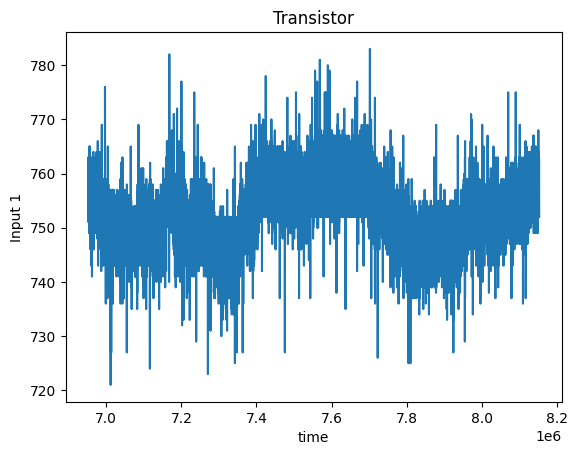

In [733]:
plt.title("Transistor")
sns.lineplot(x="time", y="value", data=transistor_data)
plt.ylabel("Input 1")
plt.show()

We observe the same spikes as with the source dataset, and we remove the most extreme outliers.

In [734]:
transistor_data = transistor_data.query("value < value.quantile(.999)")
transistor_data = transistor_data.query("value > value.quantile(.001)")

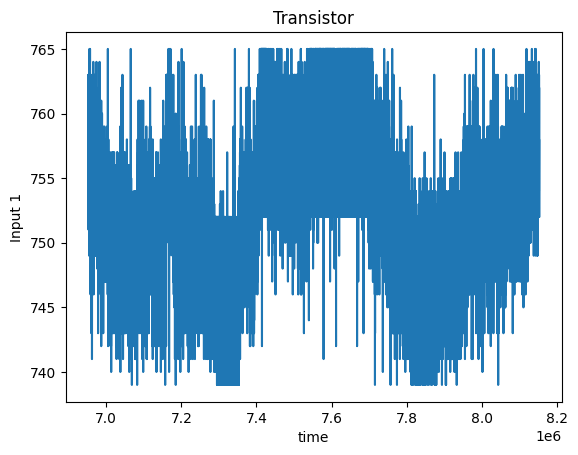

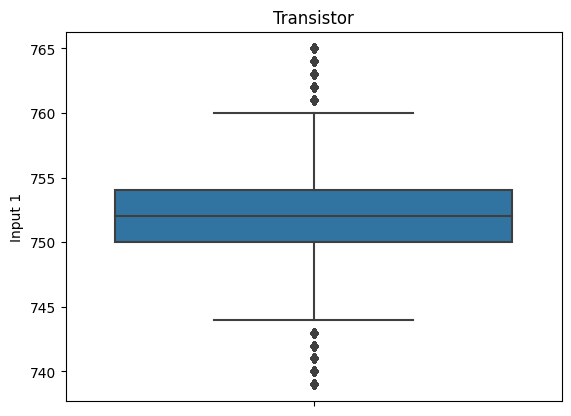

In [735]:
plt.title("Transistor")
sns.lineplot(x="time", y="value", data=transistor_data)
plt.ylabel("Input 1")
plt.show()

plt.title("Transistor")
sns.boxplot(y="value", data=transistor_data)
plt.ylabel("Input 1")
plt.show()

We still have some outliers, however due to the shape of the data, we cannot remove them without throwing away useful data. We will leave them in the dataset.

### Value 2

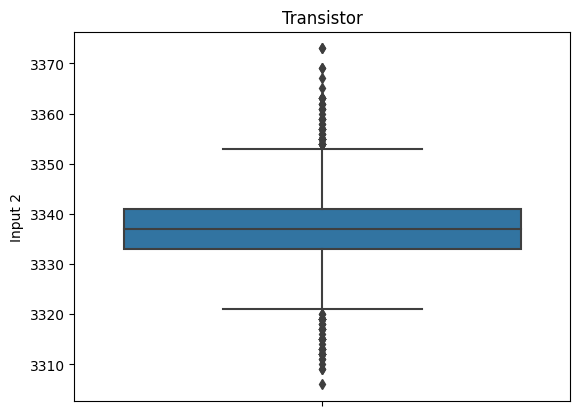

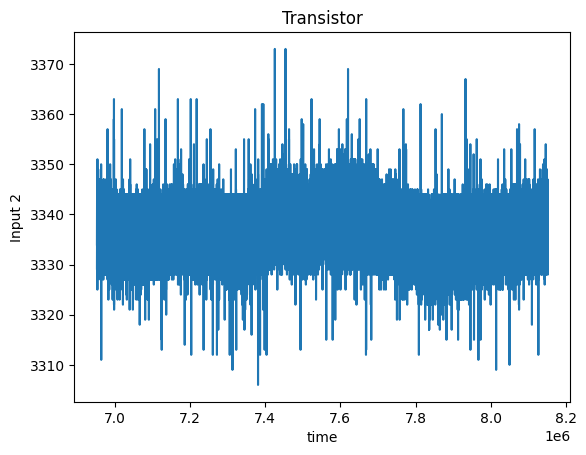

In [736]:
plt.title("Transistor")
sns.boxplot(y="value2", data=transistor_data)
plt.ylabel("Input 2")
plt.show()

plt.title("Transistor")
sns.lineplot(x="time", y="value2", data=transistor_data)
plt.ylabel("Input 2")
plt.show()

We observe more spikes and remove them.

In [737]:
transistor_data = transistor_data.query("value2 < value2.quantile(.999)")
transistor_data = transistor_data.query("value2 > value2.quantile(.001)")

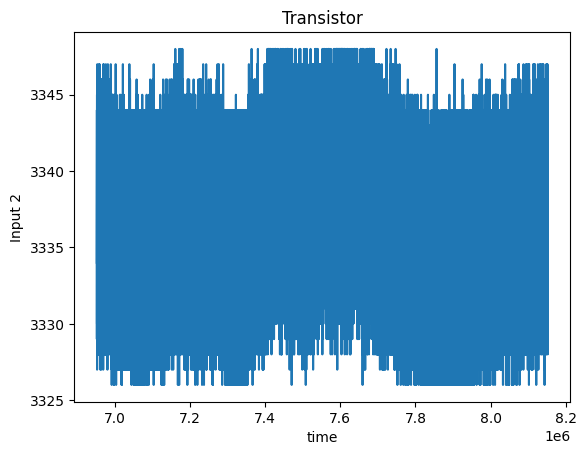

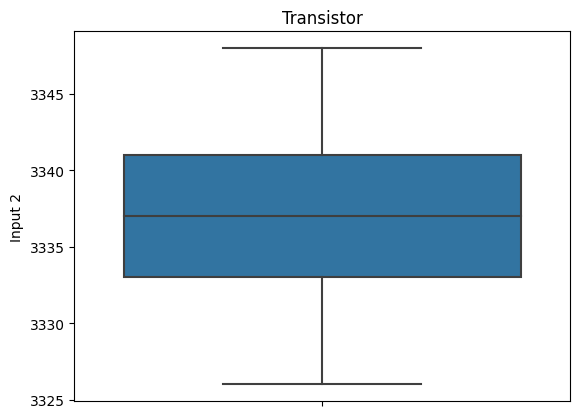

In [738]:
plt.title("Transistor")
sns.lineplot(x="time", y="value2", data=transistor_data)
plt.ylabel("Input 2")
plt.show()

plt.title("Transistor")
sns.boxplot(y="value2", data=transistor_data)
plt.ylabel("Input 2")
plt.show()

We check that the value 1 dataset is not affected by this change.

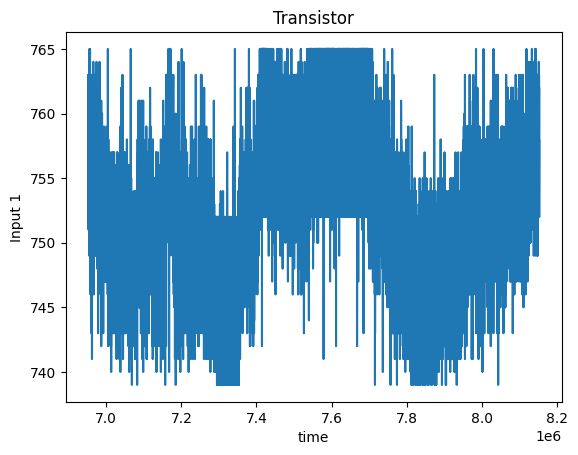

In [739]:
plt.title("Transistor")
sns.lineplot(x="time", y="value", data=transistor_data)
plt.ylabel("Input 1")
plt.show()

The value 1 graph looks the same as before, meaning our change was ok.

## Clean the transistor reverse data

### Time axis

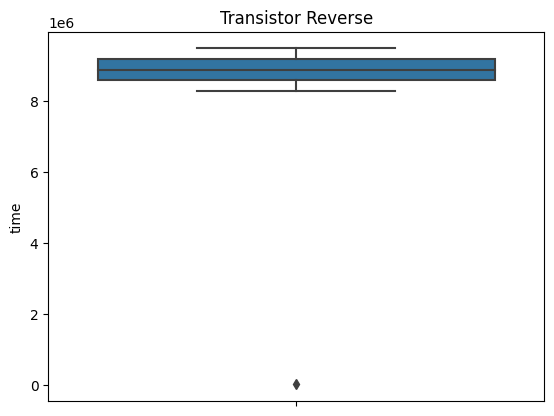

In [740]:
plt.title("Transistor Reverse")
sns.boxplot(y="time", data=transistor_reverse_data)
plt.show()

In [741]:
transistor_reverse_data.drop(np.argmin(transistor_reverse_data["time"]), inplace=True)

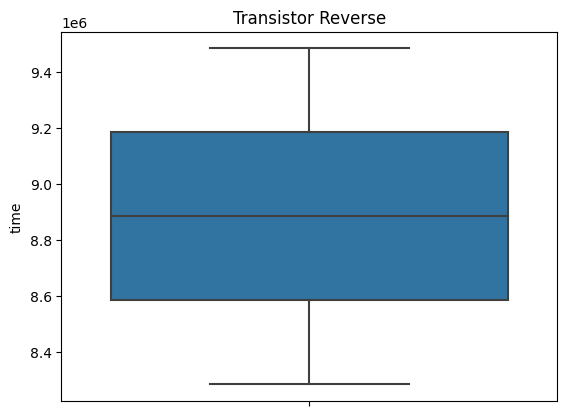

In [742]:
plt.title("Transistor Reverse")
sns.boxplot(y="time", data=transistor_reverse_data)
plt.show()

### Value 1

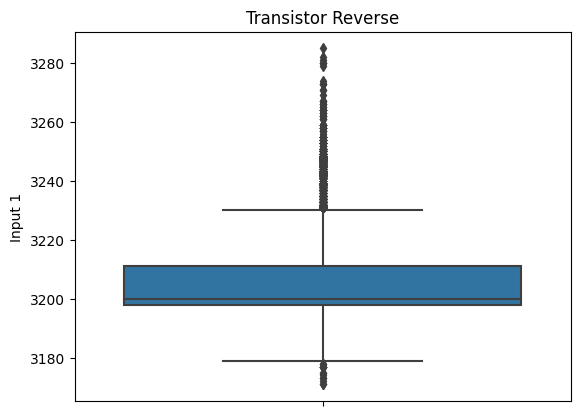

In [743]:
plt.title("Transistor Reverse")
sns.boxplot(y="value", data=transistor_reverse_data)
plt.ylabel("Input 1")
plt.show()

We observe spikes, but mostly on one side. Lets inspect the data closer to determine if this is of importance.

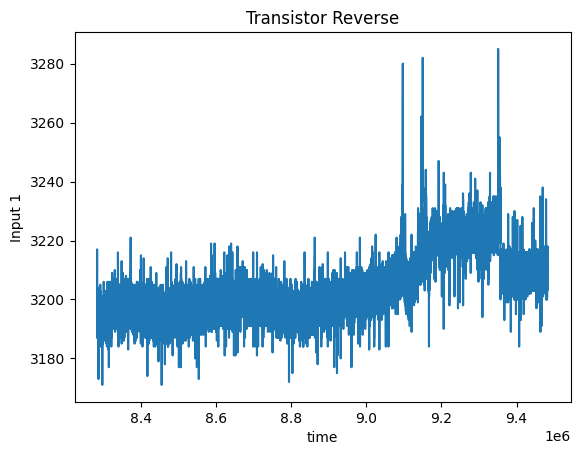

In [744]:
plt.title("Transistor Reverse")
sns.lineplot(x="time", y="value", data=transistor_reverse_data)
plt.ylabel("Input 1")
plt.show()

We can see that the extreme spikes are very rare, and do not need them for the current analysis. We remove the outliers like before, but this time, we remove .993 from the upper side instead of .999, in order to eliminate more of the spikes.

In [745]:
transistor_reverse_data = transistor_reverse_data.query("value < value.quantile(.993)")
transistor_reverse_data = transistor_reverse_data.query("value > value.quantile(.001)")

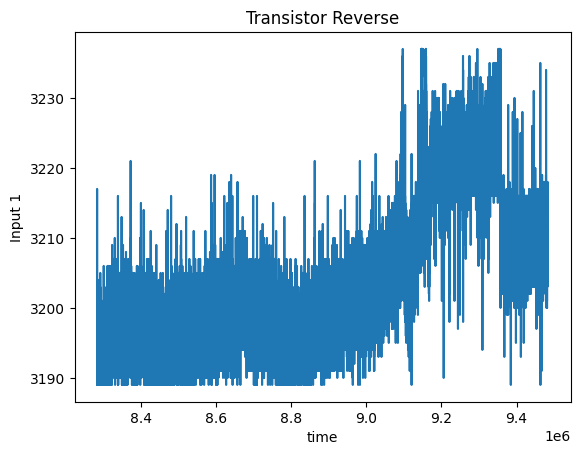

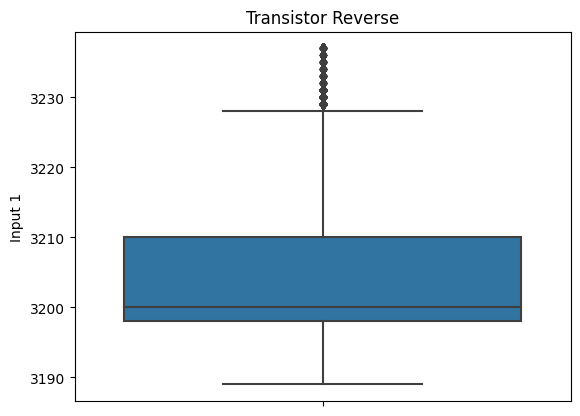

In [746]:
plt.title("Transistor Reverse")
sns.lineplot(x="time", y="value", data=transistor_reverse_data)
plt.ylabel("Input 1")
plt.show()

plt.title("Transistor Reverse")
sns.boxplot(y="value", data=transistor_reverse_data)
plt.ylabel("Input 1")
plt.show()

We have eliminated most of the outliers, and the data still appears to fairly represent the original.

### Value 2

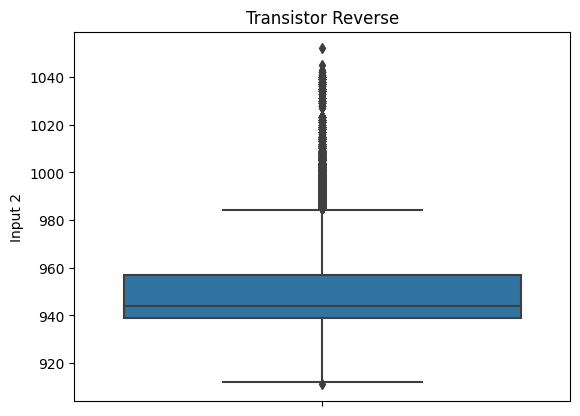

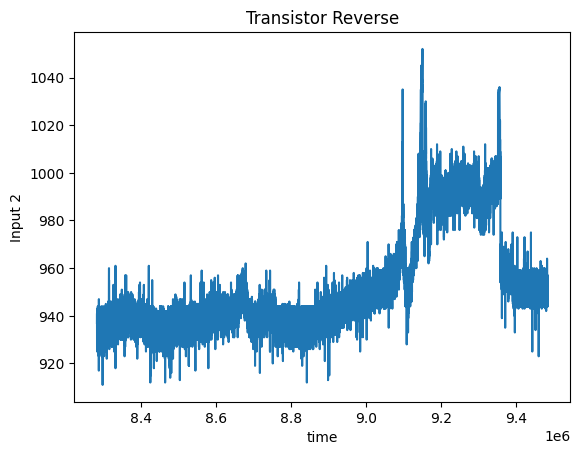

In [747]:
plt.title("Transistor Reverse")
sns.boxplot(y="value2", data=transistor_reverse_data)
plt.ylabel("Input 2")
plt.show()

plt.title("Transistor Reverse")
sns.lineplot(x="time", y="value2", data=transistor_reverse_data)
plt.ylabel("Input 2")
plt.show()

We also observe strange values for value 2. We will contemplate this later, but for now we will simply remove the spikes.

In [748]:
transistor_reverse_data = transistor_reverse_data.query("value2 < value2.quantile(.993)")
transistor_reverse_data = transistor_reverse_data.query("value2 > value2.quantile(.001)")

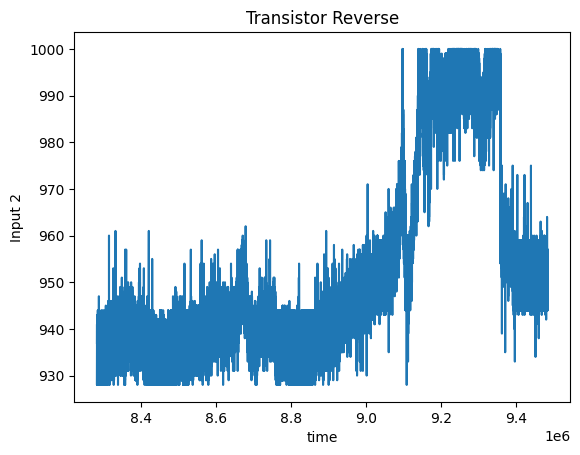

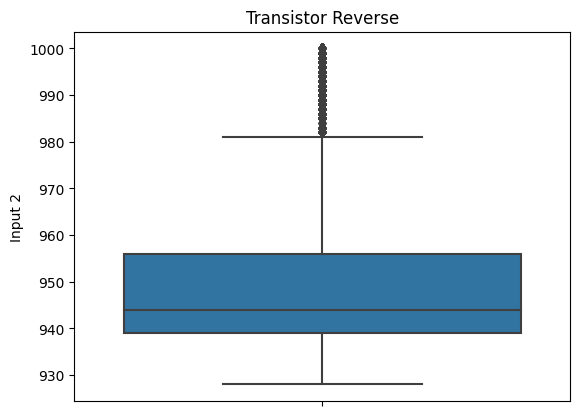

In [749]:
plt.title("Transistor Reverse")
sns.lineplot(x="time", y="value2", data=transistor_reverse_data)
plt.ylabel("Input 2")
plt.show()

plt.title("Transistor Reverse")
sns.boxplot(y="value2", data=transistor_reverse_data)
plt.ylabel("Input 2")
plt.show()

## Comparing the inputs

### Comparing the two values from the source dataset

In [750]:
print("Variance 1:", base_source_data["value"].var())
print("Variance 2:", base_source_data["value2"].var())
print("Range 1:", base_source_data["value"].max() - base_source_data["value"].min())
print("Range 2:", base_source_data["value2"].max() - base_source_data["value2"].min())

Variance 1: 7.2256726810306215
Variance 2: 11.571617604820352
Range 1: 14
Range 2: 13


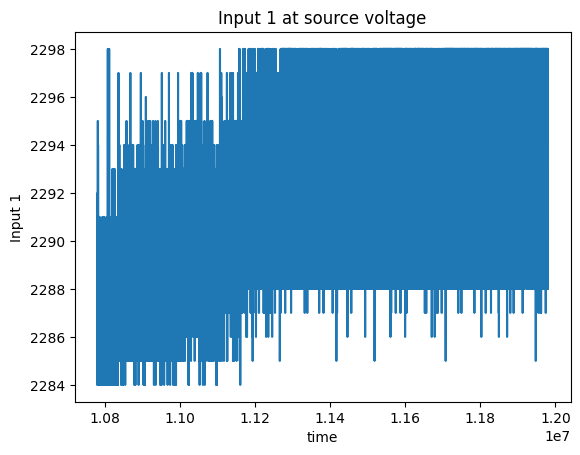

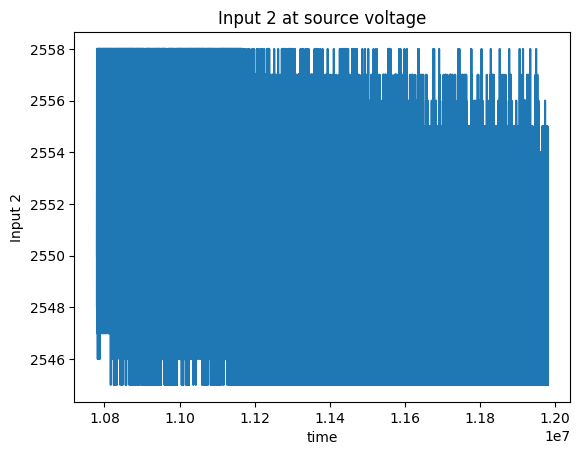

In [751]:
plt.title("Input 1 at source voltage")
sns.lineplot(x="time", y="value", data=base_source_data)
plt.ylabel("Input 1")
plt.show()

plt.title("Input 2 at source voltage")
sns.lineplot(x="time", y="value2", data=base_source_data)
plt.ylabel("Input 2")
plt.show()

We observe strange behaviour in value 1. We will investigate this further by comparing the two other datasets. In transistor and transistor reversed, the measurement points for value 1 ant 2 have been swapped. While the filters attached to each input remain the same, the filters were attached to different points in the circuit. This way, we can view the input and filrter as a single package when comparing the two datasets.

### Comparing the transistor base voltage from the transistor and transistor reversed datasets

In [752]:
print("Variance:", transistor_data["value"].var())
print("Variance rev:", transistor_reverse_data["value2"].var())
print("Range:", transistor_data["value"].max() - transistor_data["value"].min())
print("Range rev:", transistor_reverse_data["value2"].max() - transistor_reverse_data["value2"].min())

Variance: 17.56778805883789
Variance rev: 384.32051481365244
Range: 26
Range rev: 72


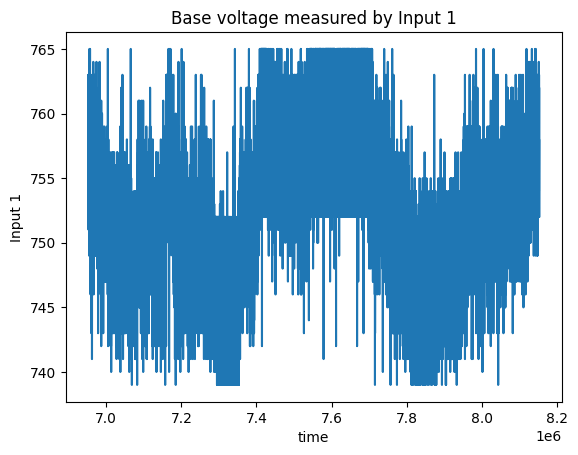

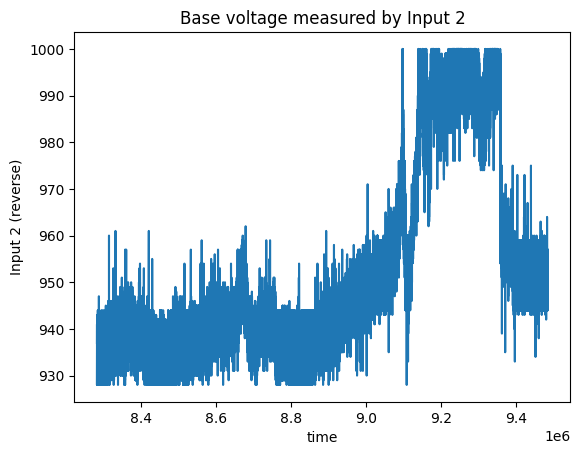

In [753]:
plt.title("Base voltage measured by Input 1")
sns.lineplot(x="time", y="value", data=transistor_data)
plt.ylabel("Input 1")
plt.show()

plt.title("Base voltage measured by Input 2")
sns.lineplot(x="time", y="value2", data=transistor_reverse_data)
plt.ylabel("Input 2 (reverse)")
plt.show()

The base voltage seems to experience extreme fluctuations on both input-filter packages.

### Comparing the transistor collector voltage from the transistor and transistor reversed datasets

In [754]:
print("Variance:", transistor_data["value2"].var())
print("Variance rev:", transistor_reverse_data["value"].var())
print("Range:", transistor_data["value2"].max() - transistor_data["value2"].min())
print("Range rev:", transistor_reverse_data["value"].max() - transistor_reverse_data["value"].min())

Variance: 24.310561921149116
Variance rev: 77.53117896197524
Range: 22
Range rev: 48


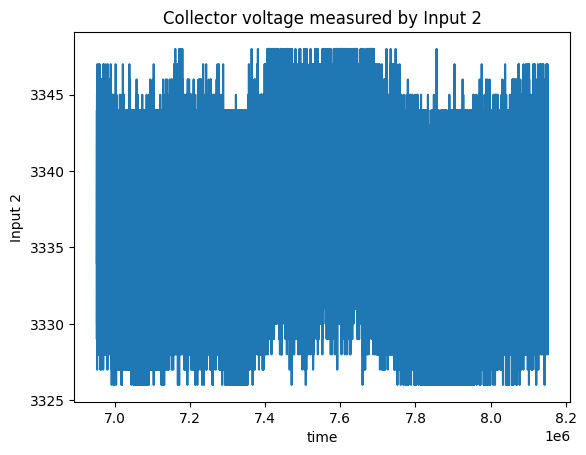

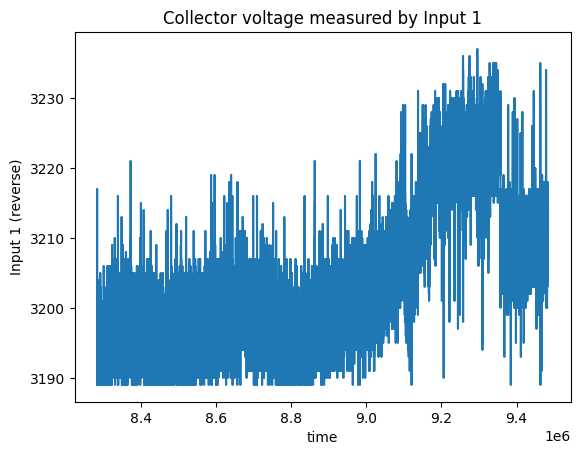

In [755]:
plt.title("Collector voltage measured by Input 2")
sns.lineplot(x="time", y="value2", data=transistor_data)
plt.ylabel("Input 2")
plt.show()

plt.title("Collector voltage measured by Input 1")
sns.lineplot(x="time", y="value", data=transistor_reverse_data)
plt.ylabel("Input 1 (reverse)")
plt.show()

### Conclusion

There is seemingly no corelation between the input-filter package and the large variations in the mid value.

We also observe that the variance is much higher for both input 1 and 2 in the reverse dataset. Since we can not find any corelation between an input-filter package and the large variations in the mid value, we can likely assume that the large variations are caused by external factors, besides the input-filter package. One possibility could be fluctuations in the power supply, which in this case is a desktop computer running other processes at varying load. It could also be caused by the air conditioner, that occationally sweeps past the experiment. We will not address these factors in this analysis.

## Choosing a dataset

Because the non-reversed dataset has fewer large variations, we will use this for our further analysis. We will also use the source dataset, to adress systematic errors from differences in the input-filter packages.

## Finding systematic errors using the source dataset

In [756]:
source_input_1_median = base_source_data["value"].median()
source_input_2_median = base_source_data["value2"].median()

source_input_1_std = base_source_data["value"].std()
source_input_2_std = base_source_data["value2"].std()

source_input_2_delta = source_input_2_median - source_input_1_median

In [757]:

print("Source input 1 median:", source_input_1_median)
print("Source input 2 median:", source_input_2_median)
print("Source input 2 delta:", source_input_2_delta)
print("Source input 1 std:", round(source_input_1_std, 2))
print("Source input 2 std:", round(source_input_2_std, 2))

Source input 1 median: 2291.0
Source input 2 median: 2550.0
Source input 2 delta: 259.0
Source input 1 std: 2.69
Source input 2 std: 3.4


We have found that input 1 and 2 have different medians. These are likely systematic errors caused by differences in the electrical components used for the input filters. We can confirm this systematic difference by comparing input 1 to input 2 in the transistor and transistor reverse datasets.

In [758]:
print("Source delta", source_input_2_delta)
print("Base delta", transistor_reverse_data["value2"].median() - transistor_data["value"].median())
print("Collector delta", transistor_data["value2"].median() - transistor_reverse_data["value"].median())

Source delta 259.0
Base delta 192.0
Collector delta 137.0


### Conclusion

We see a clear difference betweeninput 1 and input 2 in all three datasets. For this reason, we will classify this as a systematic error, and account for it in future calculations.

## Correcting the transistor dataset for the systematic error in Input 2

We will correct for the systematic error by subtracting the source_input_2_delta from input 2 in the transistor dataset. This will not fix anything in regards to calculating exact voltage, however it will go a long way in comparing the changes between the two inputs, and thus analyzing what effect the noise could have on a voltage calculated from a measurement directly on the collector, as oposed to being calculated from the base voltage through the transistor, which is subject to additional amplification, and thus increased uncertanty.

In [759]:
transistor_data["value2"] = transistor_data["value2"] - source_input_2_delta

## Analyzing the corrected transistor dataset

In [760]:
transistor_input_1_median = transistor_data["value"].median()
transistor_input_2_median = transistor_data["value2"].median()
transistor_input_1_std = transistor_data["value"].std()
transistor_input_2_std = transistor_data["value2"].std()

In [761]:
print("Transistor input 1 median:", transistor_input_1_median)
print("Transistor input 2 median:", transistor_input_2_median)
print("Transistor input 1 std:", round(transistor_input_1_std, 2))
print("Transistor input 2 std:", round(transistor_input_2_std, 2))

Transistor input 1 median: 752.0
Transistor input 2 median: 3078.0
Transistor input 1 std: 4.19
Transistor input 2 std: 4.93


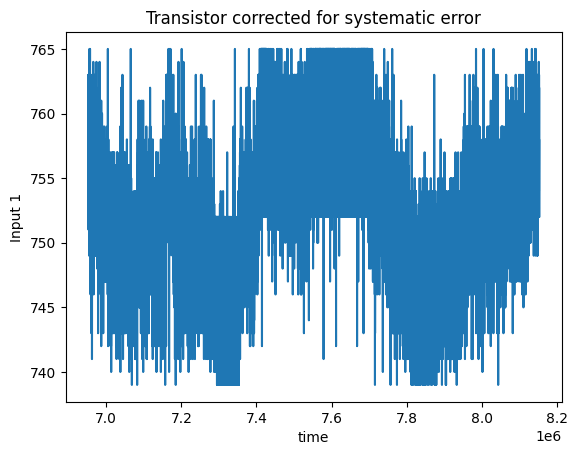

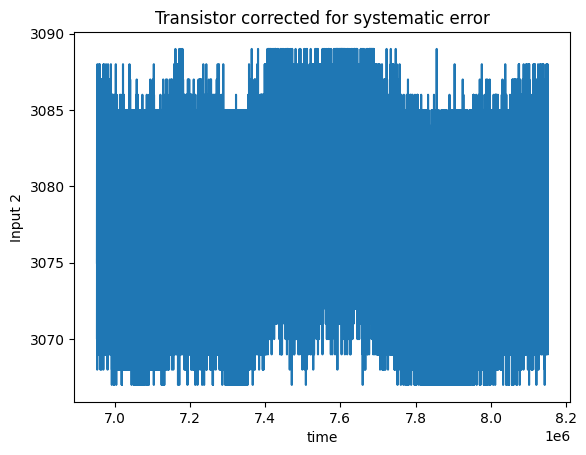

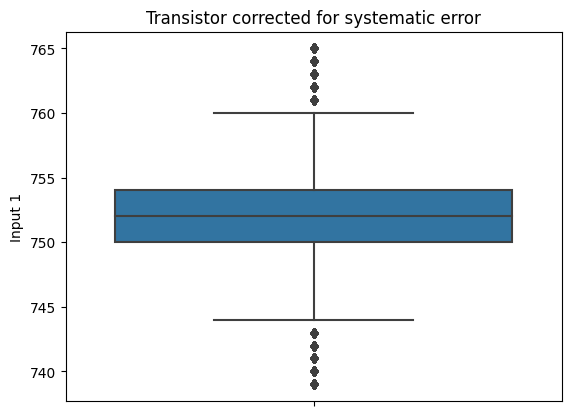

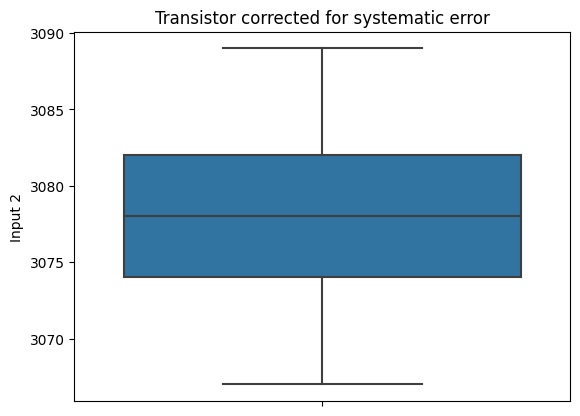

In [762]:
plt.title("Transistor corrected for systematic error")
sns.lineplot(x="time", y="value", data=transistor_data)
plt.ylabel("Input 1")
plt.show()

plt.title("Transistor corrected for systematic error")
sns.lineplot(x="time", y="value2", data=transistor_data)
plt.ylabel("Input 2")
plt.show()

plt.title("Transistor corrected for systematic error")
sns.boxplot(y="value", data=transistor_data)
plt.ylabel("Input 1")
plt.show()

plt.title("Transistor corrected for systematic error")
sns.boxplot(y="value2", data=transistor_data)
plt.ylabel("Input 2")
plt.show()

## Plot the input distributions

Lets plot the distributions of the inputs to see if they follow any known distribution.

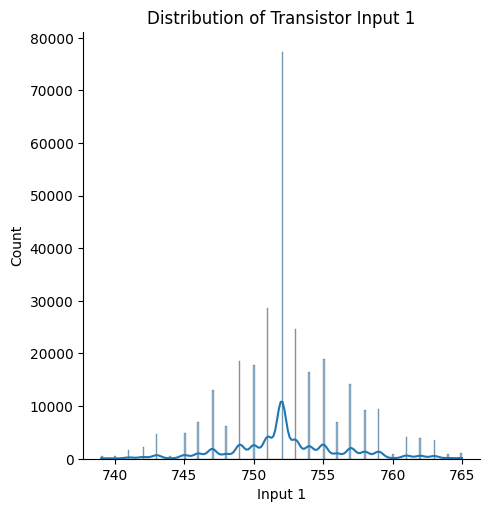

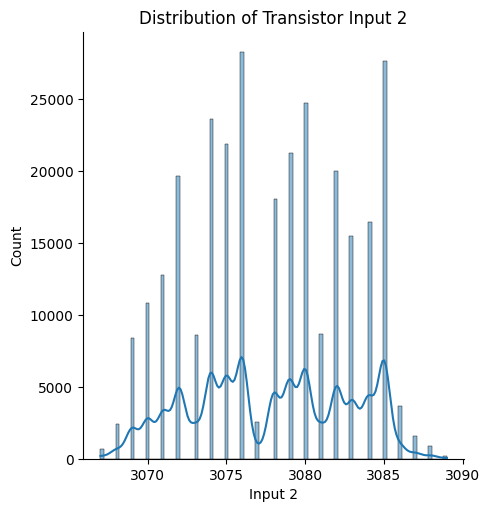

In [763]:
sns.displot(transistor_data, x="value", kde=True)
plt.title("Distribution of Transistor Input 1")
plt.xlabel("Input 1")
plt.show()

sns.displot(transistor_data, x="value2", kde=True)
plt.title("Distribution of Transistor Input 2")
plt.xlabel("Input 2")
plt.show()

We can see that input 1 is somewhat matches a normal distribution, but input 2 does not. This is an interesting observation but not currently useful.

## Converting the dataset from voltages to currents

First we define the physical properties of our circuit. For the moment, we will not use uncertanties, so they we can observe the impact from the inputs alone. Later, we will include the voltage sources and the resistances, to see the impact of the entire system.

### Calculating Ic and Ib

This is the formula we will use to calculate beta.

$\Huge\beta
=\frac{I_{c}}{I_{b}}
=\frac{\frac{V_{Rc}}{R_{c}}}{\frac{V_{Rb}}{R_{b}}}
=\frac{\frac{V_{cc}-V_{c}}{R_{c}}}{\frac{V_{bs}-V_{b}}{R_{b}}}
=\frac{\frac{V_{cc}-\frac{in_{2}}{4095}*V_{cc}}{R_{c}}}{\frac{\frac{3000}{4095}*V_{cc}-\frac{in_{1}}{4095}*V_{cc}}{R_{b}}}$

In [764]:
Rc = 33
Rb = 22e3
Vcc = 3.3
Vbs = (3000/4095) * Vcc

Now we convert the voltages to currents

In [765]:
Vc = ((transistor_data["value2"] / 4095) * Vcc)
Vb = ((transistor_data["value"] / 4095) * Vcc)
Vrc = Vcc - Vc
Vrb = Vbs - Vb
Ic = Vrc / Rc
Ib = Vrb / Rb

In [766]:
print("Vc =", round(Vc.median(), 2), "V")
print("Vb =", round(Vb.median()*1e3, 1), "mV")
print("Ic =", round(Ic.median()*1e3, 1), "mA")
print("Ib =", round(Ib.median()*1e6, 1), "uA")
print("Ic_std =", round(Ic.std()*1e3, 3), "mA")
print("Ib_std =", round(Ib.std()*1e6, 3), "uA")

Vc = 2.48 V
Vb = 606.0 mV
Ic = 24.8 mA
Ib = 82.3 uA
Ic_std = 0.12 mA
Ib_std = 0.154 uA


The datasheet for this transistor says that at the observed Ib=83uA and Vc=2.5V we expect Ic=25mA. These values match what we expect. Lets look at the relationship between the base current and collector current. We also measured the voltages and found that Vc matches the calculated value, while Vb is slightly higher at 0.8V. It should be noted however, that this measurement was performed the day after the datasets were collected, and other external factors such as the instrument used may have influenced the results. Bias is also a factor in these manual readings. Before we continue, lets plot the currents.

### Plot Ic and Ib

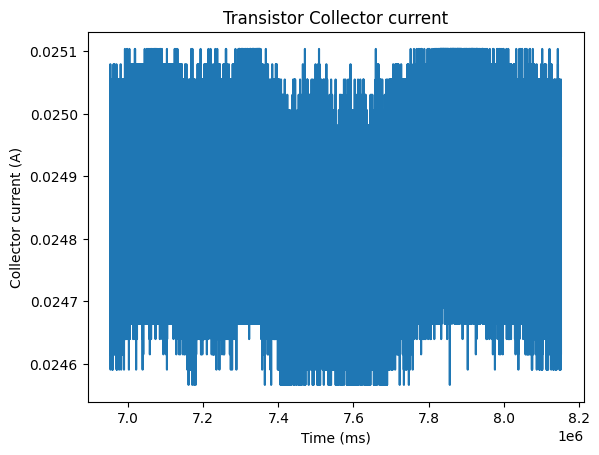

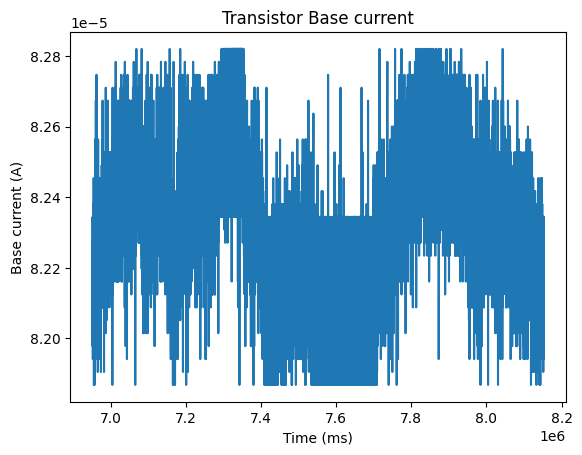

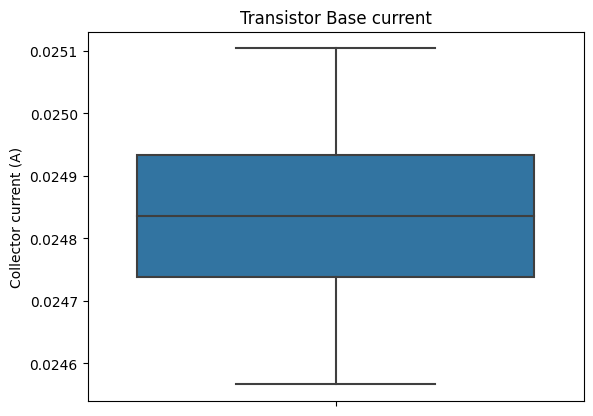

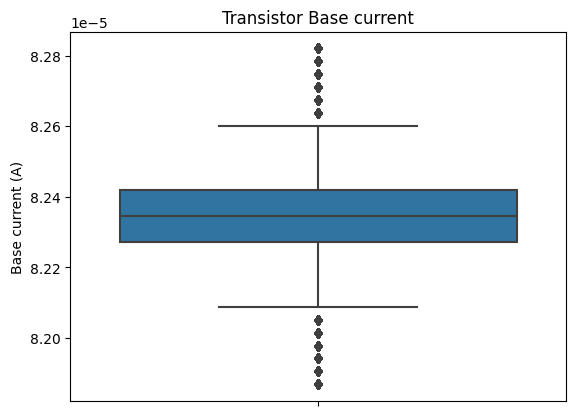

In [767]:
plt.title("Transistor Collector current")
sns.lineplot(x="time", y=Ic, data=transistor_data)
plt.ylabel("Collector current (A)")
plt.xlabel("Time (ms)")
plt.show()

plt.title("Transistor Base current")
sns.lineplot(x="time", y=Ib, data=transistor_data)
plt.ylabel("Base current (A)")
plt.xlabel("Time (ms)")
plt.show()

plt.title("Transistor Base current")
sns.boxplot(y=Ic)
plt.ylabel("Collector current (A)")
plt.show()

plt.title("Transistor Base current")
sns.boxplot(y=Ib)
plt.ylabel("Base current (A)")
plt.show()

## Calculate the current gain (beta)

Even with the noise in the data, we can still see a clear relation between the base and collector current. Lets now look at the current gain. Lets first look at the dataset and ensure that there is a linear relationship between the base and collector current.

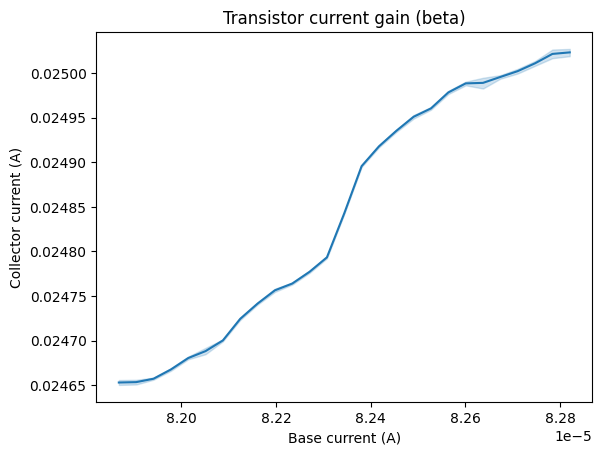

In [768]:
plt.title("Transistor current gain (beta)")
sns.lineplot(x=Ib, y=Ic)
plt.ylabel("Collector current (A)")
plt.xlabel("Base current (A)")
plt.show()

Perfect! While the scew towards the center of the dataset causes the graph to deviate somewhat, there is a clear linear relationship between these two values. Now lets find the current gain, beta.

In [769]:
beta = Ic/Ib

In [770]:
print("beta =", round(beta.median(), 2))
print("beta_std =", round(beta.std(),2 ))

beta = 301.68
beta_std = 1.14


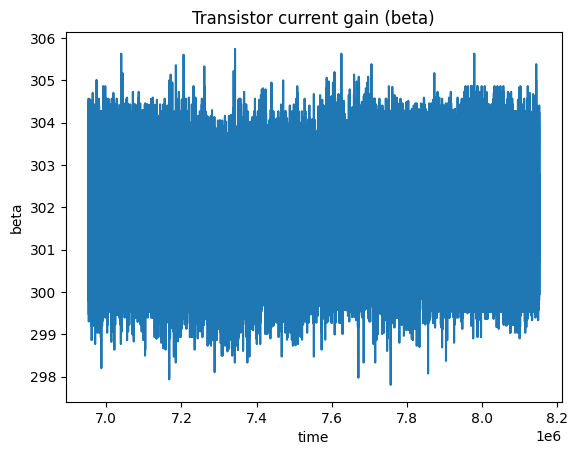

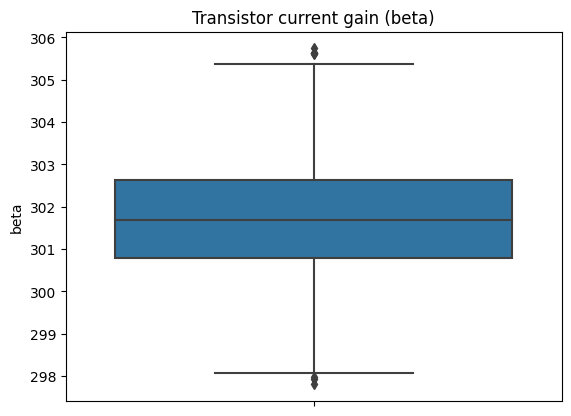

In [771]:
plt.title("Transistor current gain (beta)")
sns.lineplot(x="time", y=beta, data=transistor_data)
plt.ylabel("beta")
plt.show()

plt.title("Transistor current gain (beta)")
sns.boxplot(y=beta)
plt.ylabel("beta")
plt.show()

### Conclusion

Based on the transistor datasheet we previously used to verify the currents and voltages, we can conclude that this gain matches our theoretical expectations. Furthermore, the manefacturer guarantees the gain to be within the range 110 to 800. This property is described as "h<sub>FE</sub>" in the datasheet.

## Explore uncertanties

### Input std coverage

Lets make sure that our input standard deviations cover a suficient range of the dataset

In [772]:
def get_std_coverage(x, factor):
    return len(x[x>x.median()-x.std()*factor][x<x.median()+x.std()*factor])/len(x)

In [773]:
std_factor = 1

In [774]:
print("std_coverage_in1 =", round(get_std_coverage(transistor_data["value"], std_factor), 2))
print("std_coverage_in2 =", round(get_std_coverage(transistor_data["value2"], std_factor), 2))

std_coverage_in1 = 0.72
std_coverage_in2 = 0.57


This shows that a large portion of our dataset is not within one standard deviation. Lets use two standard deviations to catch a larger portion of the dataset.

In [775]:
std_factor = 2

In [776]:
print("std_coverage_in1 =", round(get_std_coverage(transistor_data["value"], std_factor), 2))
print("std_coverage_in2 =", round(get_std_coverage(transistor_data["value2"], std_factor), 2))

std_coverage_in1 = 0.92
std_coverage_in2 = 0.99


This is much better. Two standard deviations is sufficient to cover the majority of the dataset.

### Uncertanty caused by the inputs

We have now found a value for beta using the entire dataset, performing math on each individual row. However, we have not yet accounted for uncertanties beyond the inputs. Lets first view the combined uncertanty of the inputs.

In [777]:
uinput1 = ufloat(transistor_input_1_median, transistor_input_1_std * std_factor)
uinput2 = ufloat(transistor_input_2_median, transistor_input_2_std * std_factor)

In [778]:
print("With an std factor of 1")
print("Input 1: {:.3u}".format(ufloat(transistor_input_1_median, transistor_input_1_std * 1)))
print("Input 2: {:.3u}".format(ufloat(transistor_input_2_median, transistor_input_2_std * 1)))

print("\nWith an std factor of", std_factor)
print("Input 1: {:.3u}".format(uinput1))
print("Input 2: {:.3u}".format(uinput2))

With an std factor of 1
Input 1: 752.00+/-4.19
Input 2: 3078.00+/-4.93

With an std factor of 2
Input 1: 752.00+/-8.38
Input 2: 3078.00+/-9.86


Now we insert the new inputs into the formula. This time though, we do not need to inspect the intermediate values, so lets just calculate the final value directly.

$\Huge\beta
=\frac{\frac{V_{cc}-\frac{in_{2}}{4095}*V_{cc}}{R_{c}}}{\frac{\frac{3000}{4095}*V_{cc}-\frac{in_{1}}{4095}*V_{cc}}{R_{b}}}$

In [779]:
uibeta = ((Vcc-(uinput2/4095)*Vcc)/Rc)/(((3000/4095)*Vcc-(uinput1/4095)*Vcc)/Rb)

In [780]:
print("beta = {:.3u}".format(uibeta))
print("row-based beta =", round(beta.median(), 2))
print("row-based std =", round(beta.std(), 2))

beta = 301.60+/-3.13
row-based beta = 301.68
row-based std = 1.14


While the per-row computation of beta is slightly more accurate, the difference is not significant. Also note that the uncertanty of beta, is the combined uncertanty of the inputs when passed through the measurment function. This is not the same as the standard deviation of the beta values.

### Uncertanty caused by the entire system


The resistanmce tolerences come from their manefacturer accuracy rating color bands.

The 3.3V regulator in the ESP32 dev board has an accuracy of +-0.099V according to its datasheet http://www.advanced-monolithic.com/pdf/ds1117.pdf.

The controlled output Vbs will also be regulated based on this voltage.

In [781]:
uRc = ufloat(33, 33*0.01)
uRb = ufloat(22e3, 22e3*0.01)
uVcc = ufloat(3.3, 0.099)

In [782]:
ubeta = ((uVcc-(uinput2/4095)*uVcc)/uRc)/(((3000/4095)*uVcc-(uinput1/4095)*uVcc)/uRb)

In [783]:
print("uibeta = {:.3u}".format(uibeta))
print("ubeta = {:.3u}".format(ubeta))

uibeta = 301.60+/-3.13
ubeta = 301.60+/-5.29


### Conclusion

While the value of beta remains the same regardless of us including the uncertanty of the rest of the system, there is a substantial change in the uncertanty when accounting for everything. This leads us to conclude that while the inputs have a meaningful effect on our measurments, the uncertanty of the rest of the system plays an equally segnificant role.

## Sensitivity analysis

Finally, it is worth looking at the sensitivities of each uncertanty, to see which one has the largest impact on the final result.

In [784]:
print("Sensitivity for uRc =", round(ubeta.derivatives[uRc], 2))
print("Sensitivity for uRb =", round(ubeta.derivatives[uRb], 4))
print("Sensitivity for uVcc =", round(ubeta.derivatives[uVcc], 16))
print("Sensitivity for uinput1 =", round(ubeta.derivatives[uinput1], 3))
print("Sensitivity for uinput2 =", round(ubeta.derivatives[uinput2], 3))

Sensitivity for uRc = -9.14
Sensitivity for uRb = 0.0137
Sensitivity for uVcc = -5.68e-14
Sensitivity for uinput1 = 0.134
Sensitivity for uinput2 = -0.297


### Conclusion

From these values, it is clear that Rc has the most substantial impact on our system. While the inputs have a clear effect, they do not present a greater challenge to our computations than any other component. Most of the uncertanties are a result of using cheap components.